# UE boss damage simulation
This attempts to simulate hitting bosses with certain lt configurations.

For now it supports Overkill, Tanya, The collector, Simba and leopard. 

It doesn't consider lt crits since we don't know the proc chance for that and we assume a baseline of crits dealing double damage without any further investment into crit dmg.

In [1]:
BASE_CRIT_DAMAGE = 100 # this means crit deal double dmg by default

In [ ]:
import random
import pandas as pd
from typing import List, Tuple, Dict

def simulate_damage(
    base_damage: float = 10.0,
    percent_damage_mod: float = 0.0,
    percent_boss_damage_mod: float = 0.0,
    crit_chance: float = 25.0,
    crit_damage: float = 50.0,
    num_hits: int = 10000,
    use_ok: bool = False,
    ok_proc_chance: float = 10.0,
    use_collector: bool = True,
    collector_multiplier: float = 3.0,
    use_tanya: bool = False,
    tanya_proc_chance: float = 30,
    tanya_dmg: int = 50,
    use_caio: bool = False,
    caio_proc_chance: float = 15.0,
    use_leopard: bool = False,
    leopard_multiplier: float = 2.0,
    use_simba: bool = False,
    simba_proc_chance: float = 4.0,
) -> Tuple[List[float], List[Dict[str, float]]]:
    """
    Simulate damage for a series of hits, with optional critical hits,
    overkill procs, Tanya procs, collector procs, Caio procs, simba procs and leopard procs.
    """
    hits = []
    proc_data = []

    for _ in range(num_hits):
        # Calculate the regular damage with generic damage and boss damage modifiers
        regular_damage = base_damage * (1 + percent_damage_mod / 100) * (1 + percent_boss_damage_mod / 100)

        is_crit = False
        collector_proc_occurred = False
        tanya_proc_occurred = False
        ok_proc_occurred = False
        ok_proc_depth = 0
        leopard_proc_occured = False
        simba_proc_occured = False

        # Determine if the hit is a critical hit
        if random.random() < crit_chance / 100:
            is_crit = True
            crit_extra_damage = regular_damage * ((crit_damage + BASE_CRIT_DAMAGE) / 100)
            damage = regular_damage + crit_extra_damage
            
            if use_ok:
                # Handle Overkill chain calculation
                multiplier = 1
                while random.random() < ok_proc_chance / 100:
                    ok_proc_occurred = True
                    ok_proc_depth += 1
                    multiplier *= 2
                    if multiplier >= 1000:
                        break
                crit_extra_damage *= multiplier
                damage = regular_damage + crit_extra_damage

            if use_tanya:
                if random.random() < tanya_proc_chance / 100:
                    tanya_proc_occurred = True
                    damage *= 1 + tanya_dmg / 100

            # Handle the collector proc (only on crit)
            if use_collector:
                if random.random() < 15 / 100:
                    collector_proc_occurred = True
                    damage *= collector_multiplier
        else:
            damage = regular_damage
            
        if use_caio:
            if random.random() < caio_proc_chance / 100:
                caio_proc_occurred = True
                damage *= 2

        # handle sk procs
        if use_leopard:
            if random.random() < 10 / 100:
                damage *= leopard_multiplier
                leopard_proc_occured = True

        if use_simba:
            if not leopard_proc_occured:
                 if random.random() < simba_proc_chance / 100:
                    damage *= 3
                    simba_proc_occured = True

        hits.append(damage)
        # Build the proc_data dictionary conditionally
        proc_entry = {
            'Damage': damage,
            'IsCrit': is_crit,
        }

        if use_collector:
            proc_entry['CollectorProcOccurred'] = collector_proc_occurred
        
        if use_ok:
            proc_entry['OKProcOccurred'] = ok_proc_occurred
            proc_entry['OKProcDepth'] = ok_proc_depth
        
        if use_tanya:
            proc_entry['TanyaProcOccurred'] = tanya_proc_occurred
            
        if use_caio:
            proc_entry['CaioProcOccurred'] = caio_proc_occurred

        if use_leopard:
            proc_entry['LeopardProcOccurred'] = leopard_proc_occured

        if use_simba:
            proc_entry['SimbaProcOccurred'] = simba_proc_occured

        proc_data.append(proc_entry)

    return hits, proc_data


# THE big simulation

In [3]:
configs = [
    {
        "lts": "J C Y G S",
        "crit_chance": 44,
        "crit_dmg": 219.2,
        "dmg": 107.45,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": False,
    },
    {
        "lts": "J C Y M S",
        "crit_chance": 49,
        "crit_dmg": 232.8,
        "dmg": 82.25,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": False,
    },
    {
        "lts": "J C Y T S",
        "crit_chance": 38,
        "crit_dmg": 171.2,
        "dmg": 82.25,
        "use_tanya": True,
        "use_collector": True,
        "use_overkill": False,
    },
    {
        "lts": "J C Y O S",
        "crit_chance": 45,
        "crit_dmg": 171.2,
        "dmg": 82.25,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": True,
    },
    {
        "lts": "J C G S T",
        "crit_chance": 47,
        "crit_dmg": 179.6,
        "dmg": 67.2,
        "use_tanya": True,
        "use_collector": True,
        "use_overkill": False,
    },  
    {
        "lts": "J C G S O",
        "crit_chance": 54,
        "crit_dmg": 179.6,
        "dmg": 67.2,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": True,
    },  
    {
        "lts": "J C M S T",
        "crit_chance": 52,
        "crit_dmg": 181.2,
        "dmg": 51.45,
        "use_tanya": True,
        "use_collector": True,
        "use_overkill": False,
    },  
    {
        "lts": "J C M S O",
        "crit_chance": 59,
        "crit_dmg": 181.2,
        "dmg": 51.45,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": True,
    },  
    {
        "lts": "J C T S O",
        "crit_chance": 48,
        "crit_dmg": 131.6,
        "dmg": 51.45,
        "use_tanya": True,
        "use_collector": True,
        "use_overkill": True,
    },  
    {
        "lts": "J C G T O",
        "crit_chance": 56,
        "crit_dmg": 98,
        "dmg": 67.2,
        "use_tanya": True,
        "use_collector": True,
        "use_overkill": True,
    },  
    {
        "lts": "J C Y G T",
        "crit_chance": 46,
        "crit_dmg": 88,
        "dmg": 107.45,
        "use_tanya": True,
        "use_collector": True,
        "use_overkill": False,
    },  
    {
        "lts": "J C Y G O",
        "crit_chance": 53,
        "crit_dmg": 88,
        "dmg": 107.45,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": True,
    },   
    {
        "lts": "S C Y M O",
        "crit_chance": 58,
        "crit_dmg": 232.8,
        "dmg": 0,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": True,
    },  
    {
        "lts": "S C M T O",
        "crit_chance": 61,
        "crit_dmg": 181.2,
        "dmg": 0,
        "use_tanya": True,
        "use_collector": True,
        "use_overkill": True,
    },  
    {
        "lts": "S C Y M A",
        "crit_chance": 62,
        "crit_dmg": 254.4,
        "dmg": 0,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": False,
    },  
    {
        "lts": "S C O M A",
        "crit_chance": 72,
        "crit_dmg": 190.8,
        "dmg": 0,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": True,
    },  
    {
        "lts": "J C G Y L",
        "crit_chance": 55,
        "crit_dmg": 88,
        "dmg": 132.65,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": False,
    },   
]


In [4]:
configs_all_lts_owned = [
    {
        "lts": "J C Y G S",
        "crit_chance": 44,
        "crit_dmg": 251.2,
        "dmg": 134.4,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": False,
    },
    {
        "lts": "J C Y M S",
        "crit_chance": 49,
        "crit_dmg": 272.4,
        "dmg": 102.9,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": False,
    },
    {
        "lts": "J C Y T S",
        "crit_chance": 38,
        "crit_dmg": 203.2,
        "dmg": 102.9,
        "use_tanya": True,
        "use_collector": True,
        "use_overkill": False,
    },
    {
        "lts": "J C Y O S",
        "crit_chance": 45,
        "crit_dmg": 203.2,
        "dmg": 102.9,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": True,
    },
    {
        "lts": "J C G S T",
        "crit_chance": 47,
        "crit_dmg": 199.6,
        "dmg": 83.65,
        "use_tanya": True,
        "use_collector": True,
        "use_overkill": False,
    },  
    {
        "lts": "J C G S O",
        "crit_chance": 54,
        "crit_dmg": 199.6,
        "dmg": 83.65,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": True,
    },  
    {
        "lts": "J C M S T",
        "crit_chance": 52,
        "crit_dmg": 206,
        "dmg": 64.05,
        "use_tanya": True,
        "use_collector": True,
        "use_overkill": False,
    },  
    {
        "lts": "J C M S O",
        "crit_chance": 59,
        "crit_dmg": 206,
        "dmg": 64.05,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": True,
    },  
    {
        "lts": "J C T S O",
        "crit_chance": 48,
        "crit_dmg": 151.6,
        "dmg": 64.05,
        "use_tanya": True,
        "use_collector": True,
        "use_overkill": True,
    },  
    {
        "lts": "J C G T O",
        "crit_chance": 56,
        "crit_dmg": 98,
        "dmg": 83.65,
        "use_tanya": True,
        "use_collector": True,
        "use_overkill": True,
    },  
    {
        "lts": "J C Y G T",
        "crit_chance": 46,
        "crit_dmg": 88,
        "dmg": 134.4,
        "use_tanya": True,
        "use_collector": True,
        "use_overkill": False,
    },  
    {
        "lts": "J C Y G O",
        "crit_chance": 53,
        "crit_dmg": 88,
        "dmg": 134.4,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": True,
    },   
    {
        "lts": "S C Y M O",
        "crit_chance": 58,
        "crit_dmg": 272.4,
        "dmg": 0,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": True,
    },  
    {
        "lts": "S C M T O",
        "crit_chance": 61,
        "crit_dmg": 206,
        "dmg": 0,
        "use_tanya": True,
        "use_collector": True,
        "use_overkill": True,
    },  
    {
        "lts": "S C Y M A",
        "crit_chance": 62,
        "crit_dmg": 301.6,
        "dmg": 0,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": False,
    },  
    {
        "lts": "S C O M A",
        "crit_chance": 72,
        "crit_dmg": 220.4,
        "dmg": 0,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": True,
    },  
    {
        "lts": "J C G Y L",
        "crit_chance": 55,
        "crit_dmg": 88,
        "dmg": 165.9,
        "use_tanya": False,
        "use_collector": True,
        "use_overkill": False,
    },   
    {
        "lts": "S C Y M T",
        "crit_chance": 51,
        "crit_dmg": 272.4,
        "dmg": 0,
        "use_tanya": True,
        "use_collector": True,
        "use_overkill": False,
    },  
    {
        "lts": "J C Y T O",
        "crit_chance": 47,
        "crit_dmg": 40,
        "dmg": 102.9,
        "use_tanya": True,
        "use_collector": True,
        "use_overkill": True,
    }, 
    {
        "lts": "S C Y T O",
        "crit_chance": 47,
        "crit_dmg": 203.2,
        "dmg": 0,
        "use_tanya": True,
        "use_collector": True,
        "use_overkill": True,
    }, 
]

In [5]:
# Example usage
num_hits = 100000
base_damage = 10
ok_proc_chance = 24
collector_multiplier = 3.5  # Multiplier for the entire hit
tanya_dmg = 110

# Initialize a dictionary to store results for all configurations
results = {
    "config": [],
    "hits": [],
    "proc_data": []
}

for config in configs_all_lts_owned:
# Initialize lists to store results from each run

    hits, proc_data = simulate_damage(
        base_damage=base_damage, 
        percent_damage_mod=config["dmg"], 
        crit_chance=100,  #  config["crit_chance"] + 10, 
        crit_damage=config["crit_dmg"], 
        num_hits=num_hits, 
        use_ok=config["use_overkill"], 
        use_collector=config["use_collector"],
        ok_proc_chance=ok_proc_chance, 
        collector_multiplier=collector_multiplier,
        use_tanya=config["use_tanya"],
        tanya_dmg=tanya_dmg)

    # Add each run's data to the results dictionary
    results["config"].append(config)
    results["hits"].append(hits)
    results["proc_data"].append(proc_data)

# Convert results to a DataFrame for easier analysis and plotting
results_df = pd.DataFrame(results)


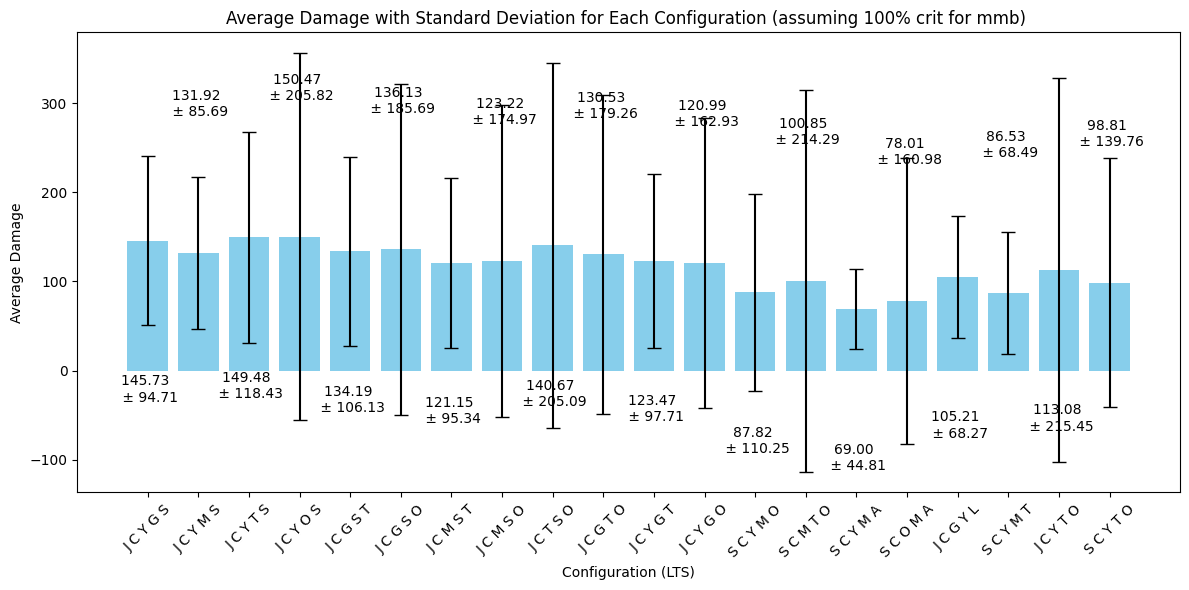

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate average damage and standard deviation for each configuration
results_summary = {
    "lts": [],
    "mean_damage": [],
    "std_dev_damage": []
}

# Iterate through the results to calculate the mean and standard deviation
for idx, row in results_df.iterrows():
    mean_damage = pd.Series(row["hits"]).mean()
    std_dev_damage = pd.Series(row["hits"]).std()
    
    # Append the results for plotting, using "lts" as the label
    results_summary["lts"].append(row["config"]["lts"])
    results_summary["mean_damage"].append(mean_damage)
    results_summary["std_dev_damage"].append(std_dev_damage)

# Convert summary to DataFrame for plotting
summary_df = pd.DataFrame(results_summary)

# Plotting the mean damage with standard deviation error bars
plt.figure(figsize=(12, 6))
bars = plt.bar(summary_df["lts"], summary_df["mean_damage"], yerr=summary_df["std_dev_damage"], capsize=5, color='skyblue')
plt.xlabel("Configuration (LTS)")
plt.ylabel("Average Damage")
plt.title("Average Damage with Standard Deviation for Each Configuration (assuming 100% crit for mmb) ") #(assuming all lts owned and higher base crit from lecter + better insigs)

# Define two different offsets for alternating labels
offset_high = -150  # Higher offset for every other bar
offset_low = 150  # Lower offset for alternating bars

# Annotate each bar with the mean and standard deviation, using alternating offsets
for i, (bar, mean, std) in enumerate(zip(bars, summary_df["mean_damage"], summary_df["std_dev_damage"])):
    # Use offset_high for even indices and offset_low for odd indices
    offset = offset_high if i % 2 == 0 else offset_low
    
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # x position
        bar.get_height() + offset,           # y position with alternating offset
        f"{mean:.2f} \n ± {std:.2f}",           # text (mean ± std deviation)
        ha='center',                         # horizontal alignment
        va='bottom' if offset > 0 else 'top' # vertical alignment based on offset sign
    )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
